Updated 23 June 2024 by Anna Preus. 

Original:
Devin Short 
30 June 2023 
shortda@uw.edu

This is a tutorial demonstrating how to explore data parsed out of the catalogues. The idea is to understand what kind of content we've generated, get a feel for how well our current tools are working, and try improving them. This notebook requires functions from `reporting.py`, currently living in the scripts directory of the github repository.

Let's import some packages and set parameters we'll use below.

In [1]:
import pandas as pd
import re

pd.set_option('display.max_colwidth', 500)

# If you're running this notebook from a directory that doesn't contain
# reporting.py you'll either need to edit the following line to reflect
# the relative location of the reporting module or copy reporting.py
# into the current directory
from reporting import histogram_strings_by_length

# The year determines which issue of the catalogue we're looking at
# across the entire notebook
year = 18

Next, we can read in the file we're focusing on and save it as a Pandas dataframe.

In [2]:
path = f'../entries/clean_entries/entries_19{year}.csv'

df = pd.read_csv(path, header=None)

To view the data, run the line below, which will display a random sample of the dataset of the length specified in parens.

In [3]:
df.sample(30)

,0
4071,"Harvard Studies in classical philology. Vol. 29. 8vo. 9 X6, pp. 178, 6s. 6d. net MILFORD, Sep.'18"
4138,"Health, Good, Doty (A. H.) 6s. net. .Dec. '17 Healin Insurance (Nat.) See Insurance (Nat. Health). Health, Ministry of, Hills (J. W.) 4d. .... July '18"
7867,"Robertson (A. White)-Studies in electro-path- Rob nson (J. J.)-National reconstruction : ology. Demy 8vo. pp. 304, 128. 6d. net study in practical politics and statesmanship. ROUTTEDGE, July '18 Cr. 8vo. 73 x 41, pp. 164, 25. 6d. net Robertson (Alexander)-Last poems. With a pre- HURST & B., July '18"
1845,"Colonial Office list (The), 1918. Comp. by Sir William H. Mercer and others. 8vo. 84 x 54, pp. 824, 185. 6d. net ..WATERLOW, July '18"
5731,"Marine engineering : Elem. questions and answers, Bottle (A. E.) 45. 64. net ..Apr. '18"
9817,"War : Fighting for our lives, Milner (Visc.) 3d. net Apr. '18"
3422,"Freytag-Loringhoven (Lt.-Gen. Baron von)—A Nation trained in arms or a militia ? lessons in war from the past and the present. Intro. by Maj.-Gen. Sir C. E. Callwell. Cr. 8vo. 71 X41, pp. 185, 4s, net ..CONSTABLE, Sep. '18"
3979,"Halos (A. G.) -My life of adventure. Cr. 8vo. 7} * 5, pp. 387, 6s. net. .HODDER & S., Nov. '18"
1751,"Clarke (E. M.)-ABC of nursing treatment. 2nd Clergy directory and parish guide, 1918. Cr. 8vo. ed. 8vo. pp. 153, Is. 3d. (Pocket guide ser.) 75 X 5, pp. 824, 4s. 6d. net SCIENTIFIC PR., May'18 (09, Shoe La., E.C. 4) J. S. PHILLIPS, Jar.. '18"
2533,"Dyestuffs, Coal tar, Application of, Whittaker (C. M.) 79. 6d. net .Aug. '18"


## <u>Summarizing data with histograms</u>

One way to start getting a rough sense of how well our splitting is working is by looking at the number of characters in all entries parsed out of one year of the catalogue. Most good entries are going to have similar lengths because they display similar data. Extremely short entries are probably fragments created by OCR errors and some extremely long entries will be multiple entries the code we're using failed to split apart.

We can get an overview by creating a histogram of the entry lengths. A histogram shows a series of bins on the bottom axis and the number of objects falling into each bin on the vertical axis. In this case I've created bins 5 characters wide, so each bar in the plot below shows the number of entries 0-5 characters long, 5-10 characters long, etc.

I've also created parameters to examine "underflow" and "overflow" regions of the histogram. Underflow and overflow counts in a histogram refer to objects that are irrelevant for some reason. In many cases a histogram will have a single underflow or overflow bin that aggregates everything outside the region of interest, but I've included the full histogram here and shaded the outflow regions.

total number of strings: 10558
number of strings shorter than 30 characters: 162, 1.5%
number of strings within outflow limits: 10234
number of strings longer than 300 characters: 162, 1.5%


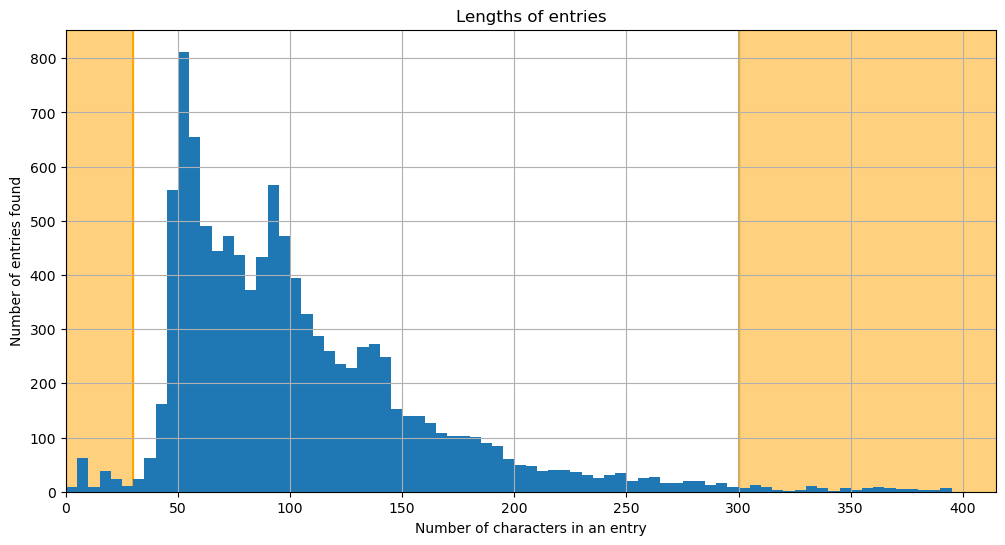

In [4]:
path = f'../entries/clean_entries/entries_19{year}.csv'

hist_results = histogram_strings_by_length(
    path,
    show_over_under=True,
    drop_nulls=True
)

Looking at the shape of the histogram, you'll see there's a large peak around 50 characters, but then there are smaller peaks at about 90 characters and 140 characters. How might we find out what causes that structure?

Let's start by viewing some of the entries

In [5]:
# Get the clean entries from a csv file. Squeeze the result to convert
# the single-column dataframe into a series.
clean_entries = df.squeeze()

# Drop null values
clean_entries = clean_entries.dropna()

# Get the length of each entry string
lengths = clean_entries.map(len)

# Get entry strings around the center of the largest peak
first_peak = clean_entries.loc[(lengths > 47) & (lengths < 53)]

# Get entries in the second peak
second_peak = clean_entries.loc[(lengths > 89) & (lengths < 96)]

# Get entries in the third peak
third_peak = clean_entries.loc[(lengths > 134) & (lengths < 140)]

tiny = clean_entries.loc[lengths<15]

# View a random sample of values in each peak

print(tiny.sample(40), '\n\n')
print(first_peak.sample(20), '\n\n')
print(second_peak.sample(20), '\n\n')
print(third_peak.sample(20))



4699           Jan. '18
4704           Dec. '18
1739                IS.
7846     UNWIN, May '18
5879           Sep. '18
10490          July '18
5432           Sep. '18
5895           Oct. '18
3526           Sep. '18
2274     DEAN, Mar. '18
1445           Seasons.
3515           Oct. '18
3305           Aug. '18
8098         Vol. 3. 14
8409           Nov. '18
1750           Feb. '18
10255           PRE IS.
10531          Ori. '18
10482          Nov. '18
7025                  I
5273             IS. 10
4560           Oct. '18
7185           July '18
4781           Mar. '18
8434           Doc. '18
1012         IS. rev. 6
7176           Sep. '18
3294           July '18
4695           Jan. '18
10285            Bk. 1.
3320            Mar '18
6829           Du: loss
8402                IS.
10537          Nov. '18
8407            May '18
1950            May '18
9394            May '18
8832     Cr 38. 6d. IS.
5719           Jan. '18
2276     DEAN, Jan. '18
Name: 0, dtype: object 


2120         C

Run the previous cell several times, examining the output carefully each time. Are there clear differences in the contents of the entries from each peak? Can they be explained by reasonable features of a real data set or do you think the structure in the histogram is a result of bad parsing?

I think we can draw three conclusions here (Devin's analysis):

1. The largest peak is the easiest to explain: title-first entries, which only contain the book title, author name, price, and month of publication, are frequently about 50 characters long. There are of course a huge number of title-first entries much longer than that, and the other two peaks are sitting on top of a long tail from the title-first peak.
2. The second peak looks like it consists mostly of author-first entries for single-author, single-title books.
3. The third peak is the most complicated. I see books that have both multiple authors and long subtitles, as well as entries that have additional information like a series name, such as `(Langham bibelots, No. 10.)`, or a note about translation, for instance `English version by A. W. Verrall.`

## <u>Testing new methods</u>

Now that we have looked at how our code is currently parsing this issue of the catalogue, we can try adding to our regular expressions patterns to see if we can split the entries more accurately. 

If you want to search for a specific word or textual pattern, you can use the code cell below and just replace "see" in the second to last line with the word or pattern you're looking for.

In [6]:
author_to_author_entries = clean_entries.loc[
    clean_entries.str.contains(' see ')
]

# python interprets two strings on successive lines as a single string
# so it's easier to read long strings in source code.
print(
    'number of entries containing " see ":'
    f' {author_to_author_entries.size}\n\n'
)

author_to_author_entries = clean_entries.loc[
    clean_entries.str.contains(' see ') & (lengths < 120)
]
author_to_author_entries.sample(20)

number of entries containing " see ": 260




552                                     Bamber (L. Kolway-) see Kelway-Bamber. “ Banco "-Kit of the kitchen. 28. net Oct. '18
8727              Stamford (F. Cortis-) see Cortis-Stamford. Stamp collections for war museums, Melville (F. J.) 6d. July '18
6947                                 Partridge (W.) see Moor (C. G.) and Partridge. Party, The, O'Brien (w.) Id... ..Jan. '18
5724                                         Mare (W. de la) see De la Mare, Margaret Roper : tragedy, Oswin (Y.) is. May '18
7634                      Read (Ernest) see Macpherson (S.) and Read. Reading book, Pauline's first, Bell (Lady) 25. Nov. '18
6594            Nurse (E. J.) see also Ivens (C. Ll.) and Nurse. Nursery rhyme book, Happy, Wood (C.) is. 6d. net .. Dec. '18
4013                     Hanson (W. W.) see Kober (G. M.) and Hanson. Happy Billy Bunny, Gross (Mrs. A.) is. 6d. net Nov. '18
1535                                                                          Chard (Victor) see Freeman (F. W.) - I 2

Now, we can look at a sample of the longest entries to see where they are not being split correctly. 

In [7]:
clean_entries.loc[(lengths > 325) & (lengths < 350)]

618                       Barry (Armstrong)-Laurel and myrtle. 7*X5, pp. 78, 28. 6d. net ..HODGE, Dec. '17 Barry (C. J., Rev.)- Tile Blurred mirror and other sermons. 75X5, pp. 154, 25, 6d. net STOCKWELL, June'is Barter (John)--How to write a good letter. Enl. by Gilbert Foyle. 16mo. swd. Is. 3d. net (121, Charing Cross Rd., W.C. 2) W. & G. FOYLE, Oct. '18
916                  Blakeney (Stepney)—How an aeroplane is built. Cr. 8vo. 71 x 5, pp. 233, 5s. net AEROPLANE AND GENERAL PUBG, Co., May '13 Blanchard (Ralph H.)--Liability and compensa- tion insurance. 8vo. pp. 406, 78. 6d. net APPLETON, Dec. '17 Bland (Hubert)—With the eyes of a man. Cheaper ed. Cr. 8vo. 77 x 48, pp. 224, swil. 23. ret GRAFTON, Nov. '18
970                             Bonavia-Hunt (D.)-Jack-a-Dandy: an Eliza - bethan viliage play. Illus. pp. 26, 9d. J. CURWEN, July 'IS Bond (Frederick Bligh)-The Gate of remem- brance : the story of the psychological experi- ment which resulted in the discovery of the Edgar Chapel 

A substantial number of long entries have a date that should mark a point to split entries that was missed for some reason. Reviewing a few samples in the previous cell, I see at least three cases that need to be handled:
1. OCR mistakes, like `I3` or `;8` or `is` rather than `18`
2. Books published in 1917 and listed in this catalogue (our code assumes `18` is part of the entry delimiter)
3. Entries with apparently well-formed 1918 dates that the current code failed on. For example, entry `6921` appears to be two entries separated by a 1918 date that was skipped over for reasons I don't understand yet. This is the kind of thing we need to look into. 

The first two cases are relatively easy to handle. Let's start by finding the regular expressions our code uses to split entries apart and build on that to improve the current process. That code is documented in `Parsing_ECB_1912_wi23.ipynb`, currently living in the `scripts` directory of the github repository. In the section "Splitting the Text into Entries" in that notebook, I find the following process:

In [ ]:
# ALL CODE IN THIS CELL IS ADAPTED FROM Parsing_ECB_1912_wi23.ipynb

# read the Hathi Trust OCR into memory
with open(f'../princeton_years/ecb_19{year}.txt', encoding='utf8') as f:
    ocr_full_text = f.read()

# Separate main text from the front matter of the catalogue (note the
# string called ocr_main_text still has the back matter attached until
# a later step)
# Note python allows multiple assignment: the split operation below
# creates a two-element list whose elements are then assigned to two
# different variables
ocr_front_matter, ocr_main_text = re.split(r'A\nACTS', ocr_full_text)

appendix_pattern = (
    r"APPENDIX\nLEARNED SOCIETIES, PRINTING CLUBS, &c., "
    r"WITH LISTS OF THEIR\nPUBLICATIONS, 1918"
)

# Separate main text from the back matter of the catalogue
ocr_main_text, ocr_back_matter = re.split(appendix_pattern, ocr_main_text)

# Make a regular expression to capture headers at the top of each
# catalogue page
header_capital_letters = r"^(?:[A-Z\-\'\sÈ]+)"
header_pattern = r"^#(?s:.*?){}(?s:.*?){}(?s:.*?){}$".format(
    header_capital_letters, header_capital_letters, header_capital_letters
)

# Split the main text into pages and strip the headers. According to
# Parsing_ECB_1912_wi23.ipynb this method fails to remove six headers.
pages = [
    re.sub(header_pattern, '', page, flags=re.M)
    for page in ocr_main_text.split('\f')
]

# Now find all lines ending in 12 and insert a token to split on
entries_by_page = [
    re.sub(r'(\W18\.?$)', '\\1<ENTRY_CUT>', page, flags=re.M)
    for page in pages
]

# Split on the token to create a list of lists where each element is
# a list of entries on an individual page
entries_by_page = [
    re.split(r'<ENTRY_CUT>', page, flags=re.M)
    for page in entries_by_page
]

print(f'total entries: {sum([len(p) for p in entries_by_page])}')

Now let's test a new regular expression for splitting entries 

In [ ]:
# This cell assumes we're looking at the 1912 catalogue; try changing
# this code (and the year parameter in the first code cell of the
# notebook) to catch OCR mistakes for a different year.

# create a list of possible values the OCR software might have created
# when it ran into an 11 or 12 on the page
ocr_interpretations_of_18 = [
    'i8',
    'I8',
    'l8'
]
ocr_interpretations_of_17 = [
    'i7',
    'I7',
    'l7'
]
terminators = ocr_interpretations_of_17 + ocr_interpretations_of_18

# modify the existing regex with our new options
entry_terminator_regex = r'(\W({})\.?$)'.format('|'.join(terminators))

# get a new set of entries the same way as above, but using the new
# regular expression
new_entries_by_page = [
    re.sub(entry_terminator_regex, '\\1<ENTRY_CUT>', page, flags=re.M)
    for page in pages
]
new_entries_by_page = [
    re.split(r'<ENTRY_CUT>', page, flags=re.M)
    for page in new_entries_by_page
]

print(f'total entries: {sum([len(p) for p in new_entries_by_page])}')


In [ ]:
new_entries_by_page[0][0].splitlines()

In [ ]:
for page in new_entries_by_page:
    for entry in page:
        for line in entry.splitlines():
            print(line)
        #print()
            print("---------")

OK, we might have found 255 entries that weren't caught with the previous splitting expression. Let's look more closely at those to see how are splitting is working:

In [ ]:
# It can be much more efficient to do things like check if elements in
# one sequence exist in another using pandas objects rather than the
# standard python library, so I flatten the lists of lists of entries
# into pandas series containing all the entries.
old_entries = pd.Series(
    [e for page in entries_by_page for e in page],
    dtype=pd.StringDtype()
)
new_entries = pd.Series(
    [e for page in new_entries_by_page for e in page],
    dtype=pd.StringDtype()
)

# strip nonprinting characters and replace all newlines in each entry
# with spaces
old_entries = old_entries.str.strip()
new_entries = new_entries.str.strip()
old_entries = old_entries.str.replace('\n', ' ')
new_entries = new_entries.str.replace('\n', ' ')

# Get new entries that don't exist in the old set
new_entries = new_entries.loc[~new_entries.isin(old_entries)]

print(f'number of new entries: {len(new_entries)}')
#print(new_entries)
print(new_entries.map(len))
# plot a histogram of lengths of the new entries
fig2 = new_entries.map(len).hist(bins=range(0, 6000, 50))

The histogram we started with covers nearly 20,000 entries. Here we have only 300, but the plot generated in the previous cell already looks extremely similar to the one at the top of the document. This means we can probably assume the entries we've produced here are just as good as the rest of the entries we're already capturing. Probably! I haven't actually looked at the new entries in detail, but it's 0200 and I need to finish this up.

## <u>Wrapping up</u>

The goal here was to demonstrate how to play around with the data and the code for our summer project. The general method I followed was something like the following:
1. Get some kind of overview of the output from our current parsing operations. I went with the size of the strings but there are all kinds of ways to do this. You could think about features of strings that have words in all caps and compare them to strings that don't have capitalized words (publishers in the author-first entries are almost always capitalized). You could start by exploring the dataframes, where the strings have been parsed out into specific fields, rather than thinking about whole entries. Explore the results we have and find something you think is interesting. If you can't think of a way to use that feature to explore the data, run it by one of your colleagues and see what they think. Your team is always your best asset!
2. Use that view of the data to characterize what's working and what isn't. In this case it was clear that unreasonably short or long strings were going to have some errors, so I was able to look at those entries to see where there might be problems in the existing process.
3. Find out which part of the existing code is relevant for the feature you're interested in. This part is probably going to be hard if you haven't had a much experience with programming. If it isn't obvious how to proceed after you've had a look at some of the scripts, ask me or Anna how to do what you want to do.
4. See if you can modify the code to get different results.
5. Use the same overview process you started with to compare your new result with the old one.
